<a href="https://colab.research.google.com/github/huongnd12/music-genre-classification/blob/main/music_genre_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Download dataset

In [ ]:
!gdown 1MGhyeMngD6P9Kz9zJpL68ylQaIQvW7Zx
!unzip GTZAN.zip -d /content/GTZAN
!rm GTZAN.zip

In [ ]:
!rm -r /content/GTZAN/images_original
!rm /content/GTZAN/features_30_sec.csv
!rm /content/GTZAN/features_3_sec.csv

# 2.Music Genre Classification

## 2.1. Music Information Retrieval

GTZAN dataset includes 1000 audios (30 seconds each audio) which are distributed into 10 genres. I'll divide each audio into 10 smaller audios (3 seconds each small audio)  to increase number of samples to 10000. Then I will create a dataset of 10000 samples whose features are means and variants of sound features.

In [ ]:
import pandas as pd
import librosa

In [ ]:
num_segment = 10      # number of segments of the song
num_mfcc = 20         # number of coefficients of MFCC
sample_rate = 22050   # default parameter of librosa library
n_fft = 2048          # default parameter of librosa library
hop_length = 512      # default parameter of librosa library

# Dictionary contains data features
my_csv={"filename":[], "chroma_stft_mean": [], "chroma_stft_var": [], "rms_mean": [], "rms_var": [], "spectral_centroid_mean": [],
        "spectral_centroid_var": [], "spectral_bandwidth_mean": [], "spectral_bandwidth_var": [], "rolloff_mean": [], "rolloff_var": [],
        "zero_crossing_rate_mean": [], "zero_crossing_rate_var": [], "harmony_mean": [], "harmony_var": [], "perceptr_mean": [],
        "perceptr_var": [], "tempo": [], "mfcc1_mean": [], "mfcc1_var" : [], "mfcc2_mean" : [], "mfcc2_var" : [],
        "mfcc3_mean" : [], "mfcc3_var" : [], "mfcc4_mean" : [], "mfcc4_var" : [], "mfcc5_mean" : [],
        "mfcc5_var" : [], "mfcc6_mean" : [], "mfcc6_var" : [], "mfcc7_mean" : [], "mfcc7_var" : [],
        "mfcc8_mean" : [], "mfcc8_var" : [], "mfcc9_mean" : [], "mfcc9_var" : [], "mfcc10_mean" : [],
        "mfcc10_var" : [], "mfcc11_mean" : [], "mfcc11_var" : [], "mfcc12_mean" : [], "mfcc12_var" : [],
        "mfcc13_mean" : [], "mfcc13_var" : [], "mfcc14_mean" : [], "mfcc14_var" : [], "mfcc15_mean" : [],
        "mfcc15_var" : [], "mfcc16_mean" : [], "mfcc16_var" : [], "mfcc17_mean" : [], "mfcc17_var" : [],
        "mfcc18_mean" : [], "mfcc18_var" : [], "mfcc19_mean" : [], "mfcc19_var" : [], "mfcc20_mean" : [],
        "mfcc20_var":[], "label":[]}

In [ ]:
import os

root_path = '/content/GTZAN/genres_original'
genres = sorted(os.listdir(root_path))
samples_per_segment = int(sample_rate*30/num_segment)
for genre in genres:
  print(f'Processing {genre} ...')
  genre_path = os.path.join(root_path, genre)
  filenames = sorted(os.listdir(genre_path))
  for f in filenames:
    file_path = os.path.join(genre_path, f)
    try:
      y, sr = librosa.load(file_path, sr=sample_rate)
    except:
      continue
    for n in range(num_segment):
      y_seg = y[samples_per_segment * n: samples_per_segment * (n+1)]
      my_csv['filename'].append(f[:-4] + f'-{n}.wav')
      my_csv['label'].append(genre)

      # Chroma
      chroma_stft = librosa.feature.chroma_stft(y=y_seg, sr=sr, n_fft=n_fft, hop_length=hop_length)
      my_csv['chroma_stft_mean'].append(chroma_stft.mean())
      my_csv['chroma_stft_var'].append(chroma_stft.var())

      # RMS Energy
      rms = librosa.feature.rms(y=y_seg)
      my_csv['rms_mean'].append(rms.mean())
      my_csv['rms_var'].append(rms.var())

      # Spectral centroid
      spec_cen = librosa.feature.spectral_centroid(y=y_seg, sr=sr)
      my_csv['spectral_centroid_mean'].append(spec_cen.mean())
      my_csv['spectral_centroid_var'].append(spec_cen.var())

      # Spectral Bandwidth
      spec_bw = librosa.feature.spectral_bandwidth(y=y_seg, sr=sr)
      my_csv['spectral_bandwidth_mean'].append(spec_bw.mean())
      my_csv['spectral_bandwidth_var'].append(spec_bw.var())

      # Roll-off
      rolloff = librosa.feature.spectral_rolloff(y=y_seg, sr=sr)
      my_csv['rolloff_mean'].append(rolloff.mean())
      my_csv['rolloff_var'].append(rolloff.var())

      # ZCR
      zcr = librosa.feature.zero_crossing_rate(y=y_seg)
      my_csv['zero_crossing_rate_mean'].append(zcr.mean())
      my_csv['zero_crossing_rate_var'].append(zcr.var())

      # HPSS
      harmoniac, percussive = librosa.effects.hpss(y=y_seg)
      my_csv['harmony_mean'].append(harmoniac.mean())
      my_csv['harmony_var'].append(harmoniac.var())
      my_csv['perceptr_mean'].append(percussive.mean())
      my_csv['perceptr_var'].append(percussive.var())

      # Tempo
      tempo, _ = librosa.beat.beat_track(y=y_seg, sr=sr)
      my_csv['tempo'].append(tempo)

      # MFCC
      mfcc = librosa.feature.mfcc(y=y_seg, sr=sr, n_mfcc=num_mfcc)
      for i in range(num_mfcc):
        mfcc_i = mfcc[i]
        my_csv[f'mfcc{i+1}_mean'].append(mfcc_i.mean())
        my_csv[f'mfcc{i+1}_var'].append(mfcc_i.var())

    print(f)

In [ ]:
df = pd.DataFrame(my_csv)
df.to_csv('/content/GTZAN/features_3_sec.csv', index=False)

In [ ]:
df = pd.read_csv('/content/GTZAN/features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

## 2.2. Data Preparation

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['filename','label'], axis=1).to_numpy()
y = df['label'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Label encoding and Feature scaling
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)


In [ ]:
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print('Label mapping: \n')
print(label_mapping)

Label mapping: 

{'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}


## 2.3. Modelling

### 2.3.1. KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Training set score: 1.00
Validation set score: 0.90
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       319
           1       0.92      0.94      0.93       308
           2       0.84      0.80      0.82       286
           3       0.87      0.90      0.89       301
           4       0.95      0.92      0.94       311
           5       0.89      0.89      0.89       286
           6       0.97      0.96      0.97       303
           7       0.92      0.94      0.93       267
           8       0.84      0.93      0.89       316
           9       0.90      0.86      0.88       300

    accuracy                           0.90      2997
   macro avg       0.90      0.90      0.90      2997
weighted avg       0.90      0.90      0.90      2997



Text(0.5, 1.0, 'KNN Classifier')

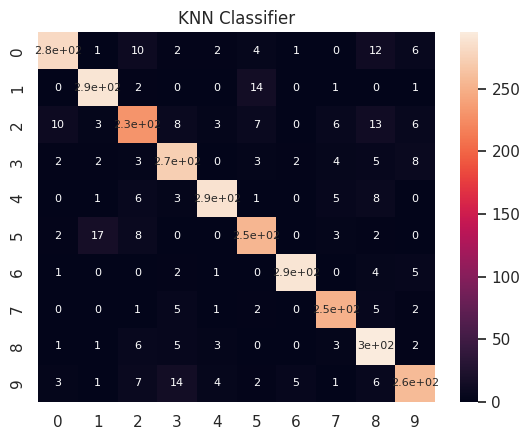

In [ ]:
knn_cls = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_cls.fit(X_train, y_train)
y_pred = knn_cls.predict(X_test)
knn_train_acc = knn_cls.score(X_train, y_train)
knn_val_acc = knn_cls.score(X_test, y_test)

print(f'Training set score: {knn_train_acc:.2f}')
print(f'Validation set score: {knn_val_acc:.2f}')

cf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

sns.set()
sns.heatmap(cf_matrix, annot=True, annot_kws={"fontsize":8})
plt.title('KNN Classifier')

### 2.3.2. SVC

Training set score: 0.91
Validation set score: 0.85
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       319
           1       0.85      0.98      0.91       308
           2       0.79      0.79      0.79       286
           3       0.81      0.80      0.80       301
           4       0.93      0.84      0.88       311
           5       0.84      0.85      0.85       286
           6       0.89      0.92      0.91       303
           7       0.87      0.90      0.89       267
           8       0.88      0.87      0.88       316
           9       0.78      0.70      0.74       300

    accuracy                           0.85      2997
   macro avg       0.85      0.85      0.85      2997
weighted avg       0.85      0.85      0.85      2997



Text(0.5, 1.0, 'SVM Classifier')

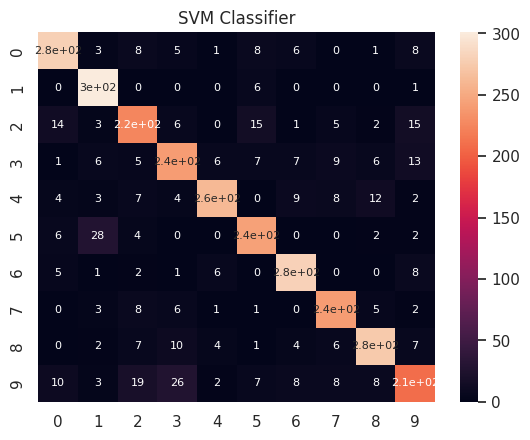

In [ ]:
from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

svm_cls = SVC(kernel='rbf', degree=3)
svm_cls.fit(X_train, y_train)
y_pred = svm_cls.predict(X_test)
svm_train_acc = svm_cls.score(X_train, y_train)
svm_val_acc = svm_cls.score(X_test, y_test)
cf_matrix = confusion_matrix(y_test, y_pred)

print(f'Training set score: {svm_train_acc:.2f}')
print(f'Validation set score: {svm_val_acc:.2f}')
print(classification_report(y_test, y_pred))

sns.heatmap(cf_matrix, annot=True, annot_kws={"fontsize":8})
plt.title('SVM Classifier')

### 2.3.3. Feed Forward Neural Network

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

Prepare data

In [ ]:
batch_size = 256

train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.int64))
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.int64))
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)


Train and Evaluate

In [ ]:
class MLP(nn.Module):
  def __init__(self, in_dims, hidden_dims, out_dims):
    super(MLP, self).__init__()
    self.layer1 = nn.Linear(in_dims, hidden_dims*2**4)
    self.layer2 = nn.Linear(hidden_dims*2**4, hidden_dims*2**3)
    self.layer3 = nn.Linear(hidden_dims*2**3, hidden_dims*2**2)
    self.layer4 = nn.Linear(hidden_dims*2**2, hidden_dims*2)
    self.layer5 = nn.Linear(hidden_dims*2, hidden_dims)
    self.layer_out = nn.Linear(hidden_dims, out_dims)
    self.dropout = nn.Dropout(0.2)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.dropout(self.relu(self.layer1(x)))
    x = self.dropout(self.relu(self.layer2(x)))
    x = self.dropout(self.relu(self.layer3(x)))
    x = self.dropout(self.relu(self.layer4(x)))
    x = self.dropout(self.relu(self.layer5(x)))
    x = self.layer_out(x)
    return x

In [ ]:
model = MLP(in_dims=X.shape[1], hidden_dims=32, out_dims=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=0.001)

In [ ]:
model

MLP(
  (layer1): Linear(in_features=58, out_features=512, bias=True)
  (layer2): Linear(in_features=512, out_features=256, bias=True)
  (layer3): Linear(in_features=256, out_features=128, bias=True)
  (layer4): Linear(in_features=128, out_features=64, bias=True)
  (layer5): Linear(in_features=64, out_features=32, bias=True)
  (layer_out): Linear(in_features=32, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (relu): ReLU()
)

In [ ]:
num_epochs = 300
train_loss, train_acc = [], []
val_loss, val_acc = [], []
n_train = len(train_dataset)
n_val = len(val_dataset)

for epoch in range(1, num_epochs+1):
  model.train()
  ep_train_loss, ep_train_acc = 0.0, 0.0

  for inputs, labels in train_loader:
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = model(inputs)

    loss = criterion(outputs, labels)
    ep_train_loss += loss.item()
    ep_train_acc += (torch.argmax(outputs, dim=1) == labels).sum().item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  ep_train_loss /= len(train_loader)
  ep_train_acc /= n_train
  train_loss.append(ep_train_loss)
  train_acc.append(ep_train_acc)

  model.eval()
  ep_val_loss, ep_val_acc = 0.0, 0.0
  with torch.no_grad():
    for inputs, labels in val_loader:
      inputs, labels = inputs.to(device), labels.to(device)
      outputs = model(inputs)

      ep_val_loss += criterion(outputs, labels).item()
      ep_val_acc += (torch.argmax(outputs, dim=1) == labels).sum().item()

  ep_val_loss /= len(val_loader)
  ep_val_acc /= n_val
  val_loss.append(ep_val_loss)
  val_acc.append(ep_val_acc)

  print('-'*59)
  print(f'Epoch {epoch:>3d}/{num_epochs}:')
  print(f'Train Loss: {ep_train_loss:.4f} | Train Accuracy: {ep_train_acc:.4f} | Valid Loss: {ep_val_loss:.4f} | Valid Accuracy: {ep_val_acc:.4f}')
  print('-'*59)

-----------------------------------------------------------
Epoch   1/300:
Train Loss: 2.0752 | Train Accuracy: 0.2451 | Valid Loss: 1.6209 | Valid Accuracy: 0.4147
-----------------------------------------------------------
-----------------------------------------------------------
Epoch   2/300:
Train Loss: 1.5774 | Train Accuracy: 0.4044 | Valid Loss: 1.2980 | Valid Accuracy: 0.5175
-----------------------------------------------------------
-----------------------------------------------------------
Epoch   3/300:
Train Loss: 1.3694 | Train Accuracy: 0.4919 | Valid Loss: 1.1854 | Valid Accuracy: 0.5626
-----------------------------------------------------------
-----------------------------------------------------------
Epoch   4/300:
Train Loss: 1.2167 | Train Accuracy: 0.5554 | Valid Loss: 1.0805 | Valid Accuracy: 0.6096
-----------------------------------------------------------
-----------------------------------------------------------
Epoch   5/300:
Train Loss: 1.0827 | Trai

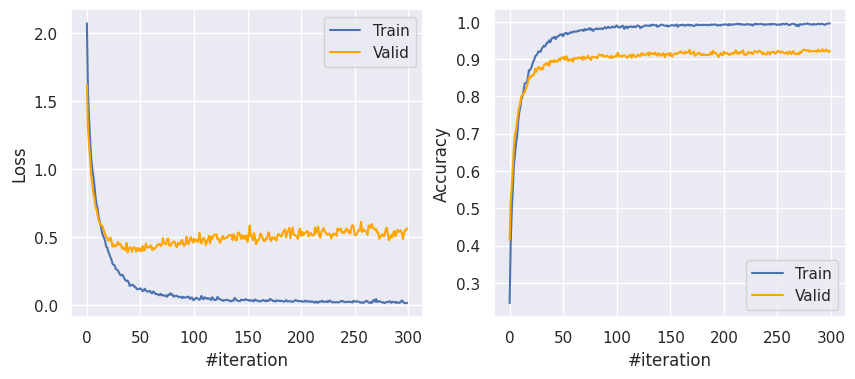

In [ ]:
fig = plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train')
plt.plot(val_loss, label='Valid', color='orange')
plt.xlabel('#iteration')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train')
plt.plot(val_acc, label='Valid', color='orange')
plt.xlabel('#iteration')
plt.ylabel('Accuracy')
plt.legend()

Prediction

In [ ]:
model = model.to('cpu')
def predict(inputs):
  with torch.no_grad():
    outputs = model(torch.tensor(inputs, dtype=torch.float32))
    preds = torch.argmax(outputs, dim=1)
    label_preds = encoder.inverse_transform(preds)
  return preds, label_preds

Training set score: 1.00
Validation set score: 0.92
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       319
           1       0.94      0.97      0.96       308
           2       0.89      0.88      0.88       286
           3       0.91      0.88      0.90       301
           4       0.92      0.93      0.92       311
           5       0.92      0.91      0.91       286
           6       0.95      0.97      0.96       303
           7       0.94      0.96      0.95       267
           8       0.93      0.92      0.92       316
           9       0.87      0.88      0.88       300

    accuracy                           0.92      2997
   macro avg       0.92      0.92      0.92      2997
weighted avg       0.92      0.92      0.92      2997



Text(0.5, 1.0, 'Neural Network')

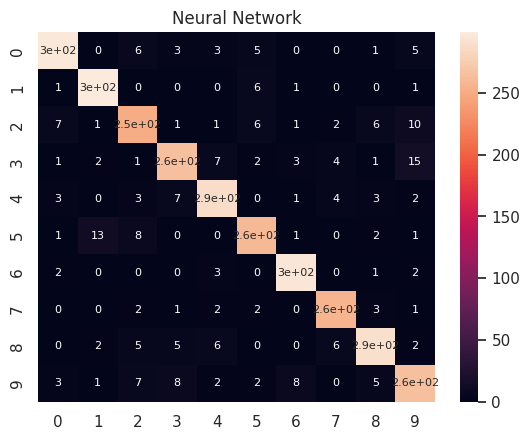

In [ ]:
y_pred, _ = predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
mlp_train_acc = train_acc[-1]
mlp_val_acc = val_acc[-1]

print(f'Training set score: {mlp_train_acc:.2f}')
print(f'Validation set score: {mlp_val_acc:.2f}')
print(classification_report(y_test, y_pred))

sns.heatmap(cf_matrix, annot=True, annot_kws={"fontsize":8})
plt.title('Neural Network')

### 2.3.4. Summary

In [ ]:
eval_summary = {'model':['KNN', 'SVM', 'Neural Network'],
                'train_accuracy': [knn_train_acc*100, svm_train_acc*100, mlp_train_acc*100],
                'valid_accuracy': [knn_val_acc*100, svm_val_acc*100, mlp_val_acc*100]}
eval_summary = pd.DataFrame(eval_summary)
eval_summary

,model,train_accuracy,valid_accuracy
0,KNN,99.928500,90.323657
1,SVM,91.348491,85.318652
2,Neural Network,99.556700,92.225559


Neural Network model gives the highest accuracy score on the test dataset.